# Import Libraries

In [27]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor

# Load Dataset
This dataset features real estate listings across the United States, categorized by state and zip code. The original dataset, sourced from Kaggle, contained 2.2 million entries. We narrowed down the data by focusing exclusively on properties in Texas, resulting in a reduced dataset with 12 columns and 40,111 rows.


In [3]:
# Load the dataset into a pandas DataFrame

Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')


In [4]:
Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


# Data Exploration and Cleaning

In the data exploration phase, we thoroughly examined the dataset to understand its structure, variable types, and key statistics. We utilized visualizations like histograms and scatter plots to identify patterns, relationships, and outliers in the data.

For data cleaning, we addressed missing values, removed duplicates, and ensured correct data types for each column. We also drop the columns we dont need for data analysis. The cleaned dataset was then validated and prepared for further analysis or modeling.

In [5]:
Real_Estate_data_df.shape

(40111, 12)

In [6]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15315 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [7]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   40093.000000  4.005300e+04  28761.000000  27158.000000  36224.000000   
mean    52715.409997  4.856361e+05      3.476931      2.678548     11.630184   
std     29786.509676  8.704503e+05      1.337864      1.212267    106.481943   
min        51.000000  0.000000e+00      1.000000      1.000000      0.000000   
25%     26918.000000  1.800000e+05      3.000000      2.000000      0.170000   
50%     52410.000000  3.400000e+05      3.000000      2.000000      0.340000   
75%     78031.000000  5.199000e+05      4.000000      3.000000      2.010000   
max    110142.000000  3.468000e+07     99.000000     25.000000   7085.560000   

             street      zip_code    house_size  
count  4.000400e+04  40111.000000  28903.000000  
mean   1.060828e+06  75815.313355   2314.157354  
std    6.059690e+05    772.033707   1379.643195  
min    2.300000e+01  11111.000000    100.000000  
25%    5.323715e+05  75206.00

In [8]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [9]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64


In [10]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by          18
status                0
price                58
bed               11350
bath              12953
acre_lot           3887
street              107
city                 17
state                 0
zip_code              0
house_size        11208
prev_sold_date    24796
dtype: int64


In [11]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [12]:
# Convert prev_sold_date to datetime
Real_Estate_data_df['prev_sold_date'] = pd.to_datetime(Real_Estate_data_df['prev_sold_date'])

In [13]:
Real_Estate_data_df.shape

(40111, 12)

In [14]:
missing_rows = Real_Estate_data_df[Real_Estate_data_df.isnull().any(axis=1)]
print(missing_rows)

       brokered_by    status     price  bed  bath  acre_lot     street  \
0          33968.0  for_sale   99000.0  1.0   1.0      5.00    49388.0   
1          88188.0  for_sale   58800.0  NaN   NaN      1.00   841041.0   
2          88188.0  for_sale   58800.0  NaN   NaN      1.00   844563.0   
3          88188.0  for_sale   58800.0  NaN   NaN      1.00   845421.0   
4          88188.0  for_sale   58800.0  NaN   NaN      1.00   859147.0   
...            ...       ...       ...  ...   ...       ...        ...   
40106      68915.0  for_sale  467847.0  5.0   4.0      0.19   773587.0   
40107      68915.0  for_sale  345249.0  5.0   3.0      0.19   772323.0   
40108      61150.0  for_sale  325000.0  NaN   NaN      0.68  1024251.0   
40109      68915.0  for_sale  456122.0  5.0   4.0      0.19   273557.0   
40110      61150.0  for_sale  325000.0  NaN   NaN      0.69  1024490.0   

                 city  state  zip_code  house_size prev_sold_date  
0           Terlingua  Texas     79852     

# Note:
After dropping NA's, data reduced to 13363 Rows. Would we want to drop the NA's or we want to fill it in with average (No. of Beds, No. Bath, and House size)

In [15]:
# dropping missing values
Clean_data_df = Real_Estate_data_df.dropna()
Clean_data_df.shape

(13363, 12)

In [16]:
# Verifying that there no more missing datas
print(Clean_data_df.isnull().sum())

brokered_by       0
status            0
price             0
bed               0
bath              0
acre_lot          0
street            0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
dtype: int64


In [17]:
Clean_data_df.shape

(13363, 12)

In [18]:
# Verifying changes
Clean_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
18,22959.0,for_sale,349000.0,6.0,5.0,4.41,307395.0,Newton,Texas,75966,5888.0,2014-06-17
19,106174.0,for_sale,249500.0,2.0,2.0,1.19,363547.0,Hemphill,Texas,75948,1872.0,2022-04-28
23,4317.0,for_sale,479000.0,5.0,4.0,6.28,840246.0,Newton,Texas,75966,4248.0,2022-05-06
27,100789.0,for_sale,179900.0,3.0,2.0,2.23,439804.0,Burkeville,Texas,75932,1240.0,2022-01-28
28,30107.0,for_sale,134900.0,4.0,2.0,0.29,1463813.0,Newton,Texas,75966,2010.0,2021-07-29


# Rebecca Data Transformation

# Data Transformation

Feature Engineering:
1. Create a new features that could capture important relationships: 
* We calculate the age of the house since it was last sold
* Calculate average house value by zip code and round to integer
* Calculate average price per square foot and round to integer
* Calculate average price per square foot by zip code and round to integer
* Create a new column 'zip_code_prefix' for the first three characters of 'zip_code'

2. Removed and convert rows and datas
* Remove rows where 'house_size' or 'price' is zero or NaN
* Remove the specified columns from the DataFrame
* Convert 'bed' and 'bath' to string, replacing NaN with '0'
* Convert 'price' and 'house_size' to integers
* Replace 'acre_lot' and 'house_age_since_sold' NaN with '0'
* Convert 'zip_code' to string, replacing NaN with '00000'


In [71]:
# Copy data to prepare for transforming
transform_data_df = Real_Estate_data_df.copy()

# Remove rows where 'house_size' or 'price' is zero or NaN
transform_data_df = transform_data_df[(transform_data_df['house_size'] != 0) & (transform_data_df['house_size'].notna())]
transform_data_df = transform_data_df[(transform_data_df['price'] != 0) & (transform_data_df['price'].notna())]

# Calculate the age of the house since it was last sold
transform_data_df['house_age_since_sold'] = (pd.to_datetime('2024-08-30') - transform_data_df['prev_sold_date']).dt.days

# Remove the specified columns from the DataFrame
columns_to_remove = ['brokered_by', 'status', 'street', 'city', 'state', 'prev_sold_date']
transform_data_df.drop(columns=columns_to_remove, inplace=True)

# Convert 'bed' and 'bath' to string, replacing NaN with '0' 
transform_data_df['bed'] = transform_data_df['bed'].fillna(0).astype(int).astype(str)
transform_data_df['bath'] = transform_data_df['bath'].fillna(0).astype(int).astype(str)

# Convert 'price' and 'house_size' to integers
transform_data_df['price'] = transform_data_df['price'].astype(int)
transform_data_df['house_size'] = transform_data_df['house_size'].astype(int)

# Replace 'acre_lot' and 'house_age_since_sold' NaN with '0'
transform_data_df['acre_lot'] = transform_data_df['acre_lot'].fillna(0).astype(int)
transform_data_df['house_age_since_sold'] = transform_data_df['house_age_since_sold'].fillna(0).astype(int)

# Convert 'zip_code' to string, replacing NaN with '00000'
transform_data_df['zip_code'] = transform_data_df['zip_code'].fillna(0).astype(int).astype(str).str.zfill(5)

# Calculate average house value by zip code and round to integer
transform_data_df['average_house_value_by_zip'] = transform_data_df.groupby('zip_code')['price'].transform('mean').round().astype(int)

# Calculate average price per square foot and round to integer
transform_data_df['price_per_sqft'] = (transform_data_df['price'] / transform_data_df['house_size']).round().astype(int)

# Calculate average price per square foot by zip code and round to integer
transform_data_df['average_price_per_sqft_by_zip'] = transform_data_df.groupby('zip_code')['price_per_sqft'].transform('mean').round().astype(int)

# Display the updated DataFrame with the new integer columns
transform_data_df.head()




,price,bed,bath,acre_lot,zip_code,house_size,house_age_since_sold,average_house_value_by_zip,price_per_sqft,average_price_per_sqft_by_zip
0,99000,1,1,5,79852,600,0,99000,165,165
7,477385,4,3,0,77583,2300,0,477385,208,208
9,208000,4,2,1,79782,1460,0,208000,142,142
10,259900,2,1,0,75932,750,0,319733,347,221
11,144900,2,1,0,75948,884,0,268061,164,152


In [73]:
transform_data_df.shape

(28801, 10)

In [74]:
transform_data_df.dtypes

price                             int32
bed                              object
bath                             object
acre_lot                          int32
zip_code                         object
house_size                        int32
house_age_since_sold              int32
average_house_value_by_zip        int32
price_per_sqft                    int32
average_price_per_sqft_by_zip     int32
dtype: object

In [76]:
# Copy data for encoding
label_encoded_data_df = transform_data_df.copy()

# Identify categorical columns
categorical_columns = ['bed','bath', 'zip_code']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    label_encoded_data_df[column] = label_encoder.fit_transform(label_encoded_data_df[column])

label_encoded_data_df = label_encoded_data_df.drop(columns=['price_per_sqft'])
label_encoded_data_df.head()

,price,bed,bath,acre_lot,zip_code,house_size,house_age_since_sold,average_house_value_by_zip,average_price_per_sqft_by_zip
0,99000,1,1,5,703,600,0,99000,165
7,477385,23,14,0,638,2300,0,477385,208
9,208000,23,10,1,702,1460,0,208000,142
10,259900,12,1,0,351,750,0,319733,221
11,144900,12,1,0,361,884,0,268061,152


# Splitting the Data
* 80% Training
* 20% Testing

In [77]:
# Separate the features (X) and the target (y)
# Separate the features (X) and the target (y)
X = label_encoded_data_df.drop(columns=['price'])  # All columns except 'price'
y = label_encoded_data_df['price']  # Target variable is 'price'

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting the Model using CatboostRegression

Performance result

The model’s performance shows that, on average, its predictions are off by 129,093 units (MAE), and while it explains about 66% of the variability in the data (R²), it still struggles with some large errors, as indicated by the high MSE of 224 billion. This suggests the model is performing reasonably well but could be improved to reduce significant prediction errors.

In [78]:

model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=10, random_state=42, verbose=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance metrics

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



Mean Absolute Error (MAE): 131489.37
Mean Squared Error (MSE): 235536872546.40
R-squared (R²): 0.6432


"In this graph, we are looking at how well our model's predictions match the actual values using a logarithmic scale. On the X-axis, we have the log of the actual values, and on the Y-axis, we have the log of the values predicted by the model. The red dashed line represents perfect predictions — if the model got every prediction exactly right, all of the points would fall on this line.

Now, what we see is that most of the points are clustered fairly close to the red line, which means the model's predictions are generally pretty good. However, there are some points that are a little off, especially as we move towards the higher values, which shows that the model struggles a bit more with making accurate predictions in these cases.

We use the logarithmic scale here because it helps to show patterns when the data spans a large range, and it makes it easier to see trends and deviations.

In summary, while the model is doing a decent job overall, there is room for improvement, particularly with the larger values, where the predictions aren’t quite as accurate."

In [89]:
y_test.head()

22455     165000
27542     406000
38848     749900
18240    1250000
38481     289000
Name: price, dtype: int32

In [91]:
y_pred

array([196687.80790486, 433370.11540202, 496283.37499221, ...,
        66815.98752672, 376495.07101742, 239603.15969414])

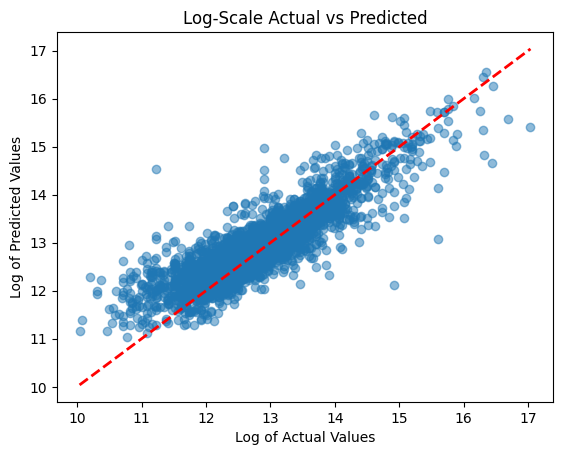

In [93]:
plt.scatter(np.log1p(y_test), np.log1p(y_pred), alpha=0.5)
plt.plot([np.log1p(y_test.min()), np.log1p(y_test.max())], 
         [np.log1p(y_test.min()), np.log1p(y_test.max())], 'r--', lw=2)
plt.xlabel("Log of Actual Values")
plt.ylabel("Log of Predicted Values")
plt.title("Log-Scale Actual vs Predicted")
plt.show()

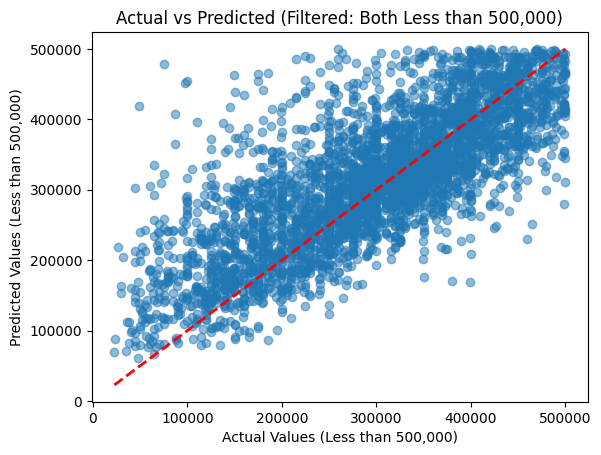

In [97]:
# Filter to include only the data where the actual values (y_test) are less than 500,000
# Create a mask to filter where both y_test and y_pred are less than 500,000
mask = (y_test < 500000) & (y_pred < 500000)

# Apply the mask to filter both y_test and y_pred
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Create the scatter plot for the filtered data
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)

# Plot the ideal line where predicted equals actual, using the filtered data
plt.plot([y_test_filtered.min(), y_test_filtered.max()], 
         [y_test_filtered.min(), y_test_filtered.max()], 'r--', lw=2)

# Set labels and title
plt.xlabel("Actual Values (Less than 500,000)")
plt.ylabel("Predicted Values (Less than 500,000)")
plt.title("Actual vs Predicted (Filtered: Both Less than 500,000)")

# Display the plot
plt.show()

In [80]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
feature_importance_df.head(20)

,Feature,Importance
4,house_size,34.847985
2,acre_lot,18.698211
7,average_price_per_sqft_by_zip,13.103124
6,average_house_value_by_zip,10.281181
3,zip_code,7.269105
1,bath,6.368901
0,bed,6.041641
5,house_age_since_sold,3.389853


In [87]:
X_train.head()

,bed,bath,acre_lot,zip_code,house_size,house_age_since_sold,average_house_value_by_zip,average_price_per_sqft_by_zip
18876,23,0,0,423,3099,0,560968,205
33986,19,10,0,437,2203,7191,698951,242
3008,19,14,0,450,2955,0,509060,228
33068,23,14,0,425,2130,1822,530206,197
27018,19,10,0,305,1699,843,544983,219


# Input new data to predict the price using the trained Model 

In [88]:
# Example new data (feature values should match the columns in X_train)

new_data = [[4,3,0,425,2500,0,0,0]]  

# Make a prediction

predicted_price = model.predict(new_data)

print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $300,268.72


# At this point, each team needs to create one training model and make predictions using a method of their choice.

# Natalie

# Russel

# Michael

# Lerma